In this part we will import a real data file .csv file to create soem visualization.
Sourse of this data are https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges-Historical-/gua4-p9wg/about_data

In [2]:
import seaborn as sns

# We also need matplotlib to visualize the data
import matplotlib.pyplot as plt

# Below command for visualization of the plots instantly
%matplotlib inline

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


We need to import pandas to read the datafile and then we will read the file

In [4]:
import pandas as pd
cycle_crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

In [6]:
# Lets have a glimpse of the dataset
cycle_crossings.head()

,date,day,month,max_temp,min_temp,precipitation,Brooklyn,Manhattan,Williamsburg,Queensboro
0,1/4/2017,Saturday,April,46.0,37.0,0.00,606,1446,1915,1430
1,2/4/2017,Sunday,April,62.1,41.0,0.00,2021,3943,4207,2862
2,3/4/2017,Monday,April,63.0,50.0,0.03,2470,4988,5178,3689
3,4/4/2017,Tuesday,April,51.1,46.0,1.18,723,1913,2279,1666
4,5/4/2017,Wednesday,April,63.0,46.0,0.00,2807,5276,5711,4197


Lets see a scatter plot from the temparature data

Text(0.5, 1.0, 'Max vs Min Temparature')

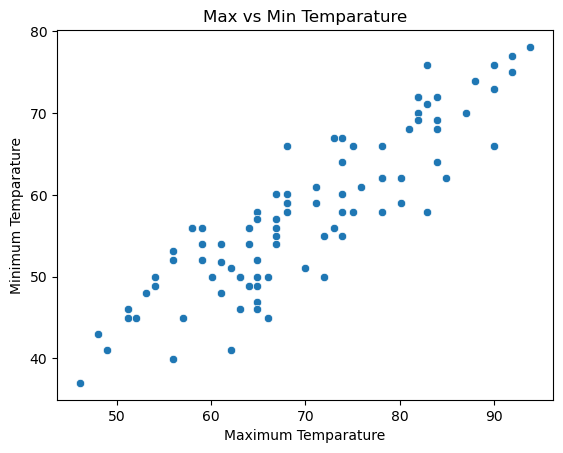

In [11]:
sns.scatterplot(data=cycle_crossings, x='max_temp', y='min_temp')
plt.xlabel('Maximum Temparature')
plt.ylabel('Minimum Temparature')
plt.title('Max vs Min Temparature')

In [12]:
Lets visualize the same plt according to month. 

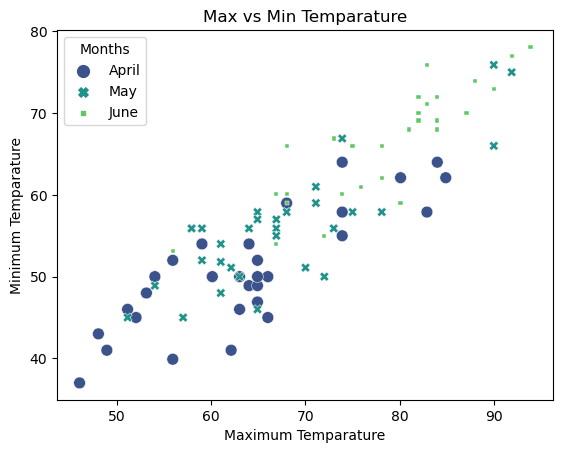

In [32]:
sns.scatterplot(data=cycle_crossings,
                x='max_temp',
                y='min_temp',
                hue='month',
                size='month',
                style='month',
                palette='viridis')
plt.xlabel('Maximum Temparature')
plt.ylabel('Minimum Temparature')
plt.title('Max vs Min Temparature')
plt.legend(title= 'Months')

What a mess the above plot is! Lots of points overlapped. Lets create separate plot for each month.

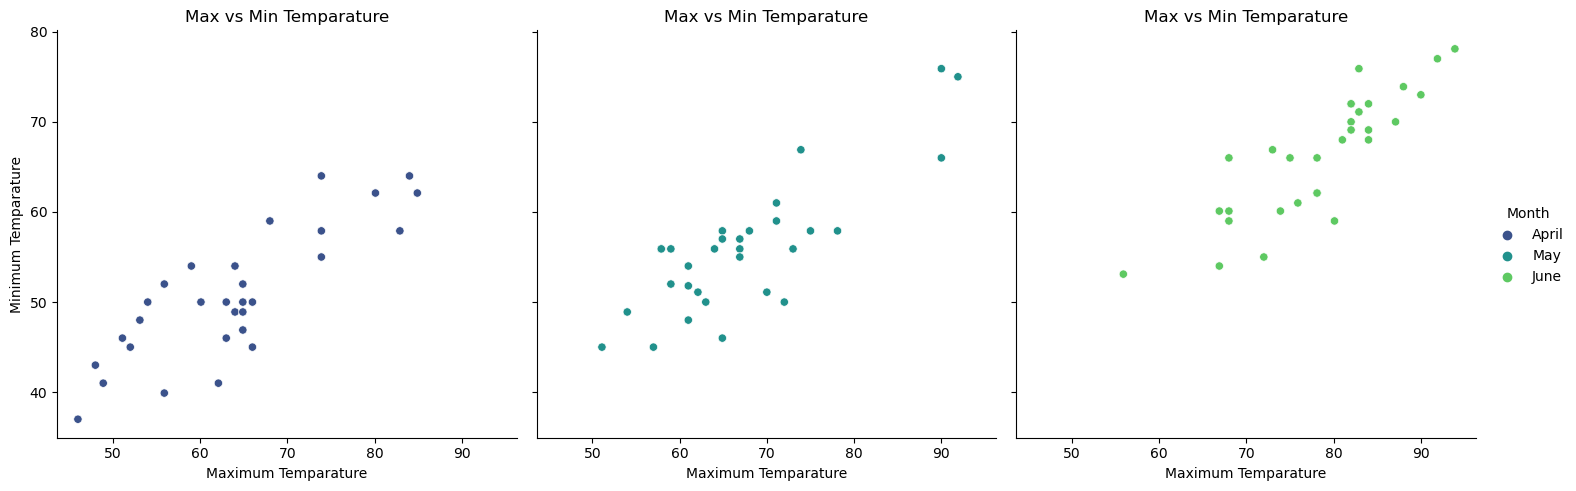

In [30]:
sns.relplot(data=cycle_crossings,
            kind='scatter',
            x='max_temp',
            y='min_temp',
            hue='month',
            col="month",
            palette='viridis').set(title='Max vs Min Temparature',
                                   xlabel='Maximum Temparature',
                                   ylabel='Minimum Temparature').legend.set_title('Month')

Lets create separate DataFrame from current DataFrame that shows the number of cycles crossed by each bridge by each date.

In [33]:
daily_crossing = cycle_crossings.melt(id_vars=['day', 'date'],
                                      value_vars=['Brooklyn', 'Williamsburg', 'Queensboro', 'Manhattan'],
                                     var_name='Bridge Name',
                                     value_name="Total Crossings").rename(columns={"day": "Day", "date": "Date"})

In [50]:
daily_crossing.head()

,Day,Date,Bridge Name,Total Crossings
0,Saturday,1/4/2017,Brooklyn,606
1,Sunday,2/4/2017,Brooklyn,2021
2,Monday,3/4/2017,Brooklyn,2470
3,Tuesday,4/4/2017,Brooklyn,723
4,Wednesday,5/4/2017,Brooklyn,2807


First see the total number of cycles crossed by the various bridges.

[Text(0.5, 1.0, 'Total number of Cycle crossed'),
 Text(0.5, 0, 'Name of the bridges')]

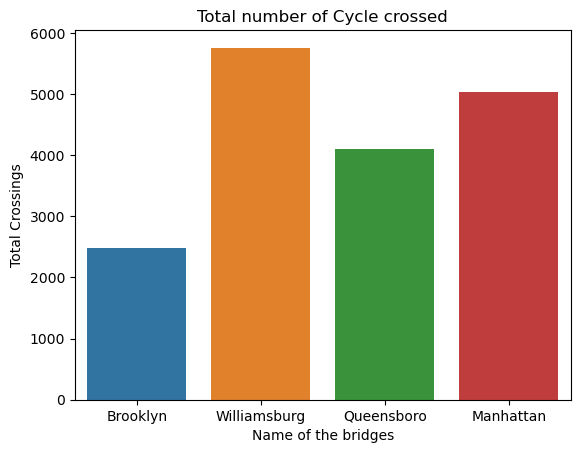

In [60]:
sns.barplot(data=daily_crossing,
            x='Bridge Name',
            y='Total Crossings',
            errorbar=None).set(title='Total number of Cycle crossed',
                                   xlabel="Name of the bridges")

Now see the same plot by different days of the week.

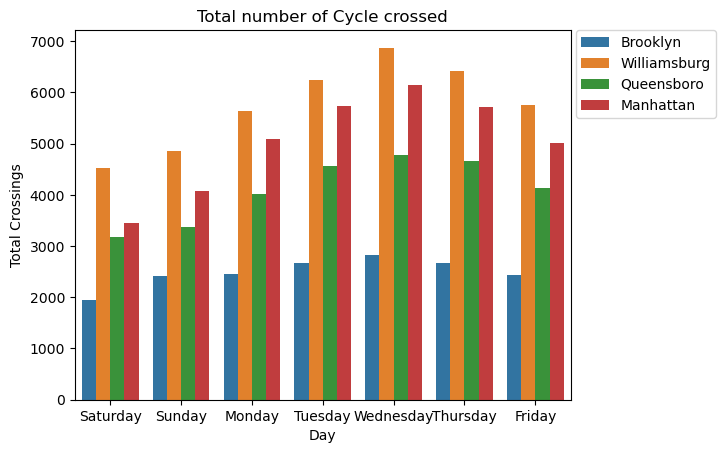

In [68]:
sns.barplot(data=daily_crossing,
            x='Day',
            y='Total Crossings',
            hue='Bridge Name',
            errorbar=None).set(title='Total number of Cycle crossed')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)